<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29892 entries, 0 to 29891
Data columns (total 11 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   FIPS Code                                                  29892 non-null  int64  
 1   State/Area                                                 29892 non-null  object 
 2   Year                                                       29892 non-null  int64  
 3   Month                                                      29892 non-null  int64  
 4   Total Civilian Non-Institutional Population in State/Area  29892 non-null  object 
 5   Total Civilian Labor Force in State/Area                   29892 non-null  object 
 6   Percent (%) of State/Area's Population                     29892 non-null  float64
 7   Total Employment in State/Area                             29892 non-null  object 
 8   Percen

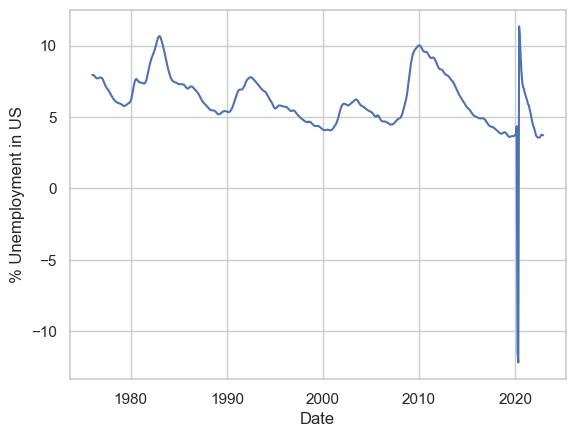

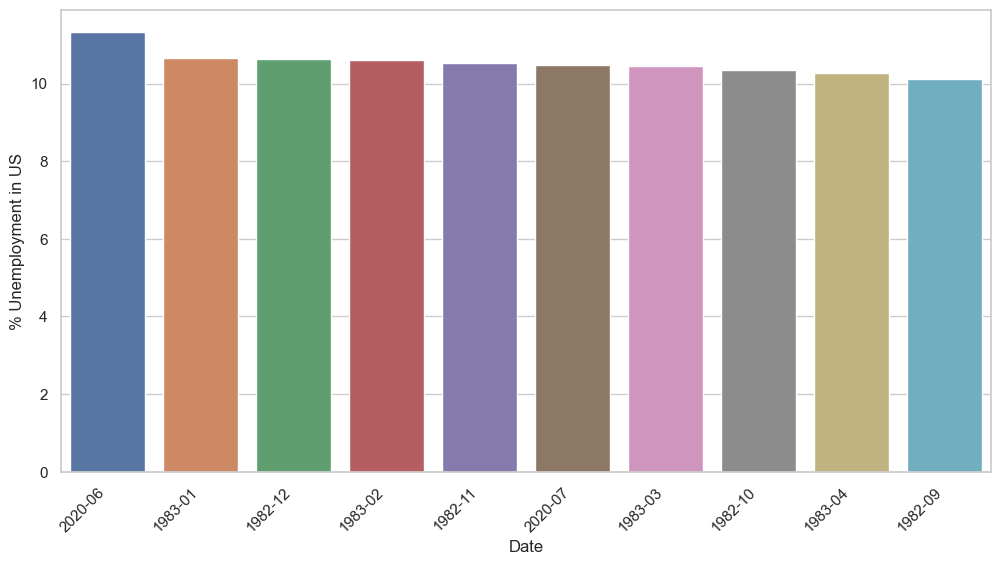

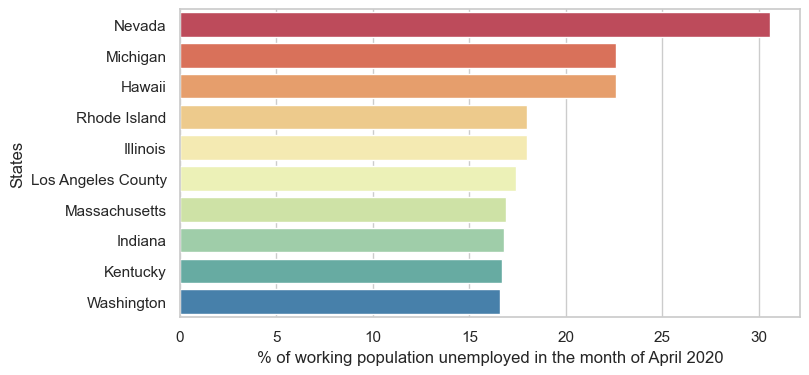

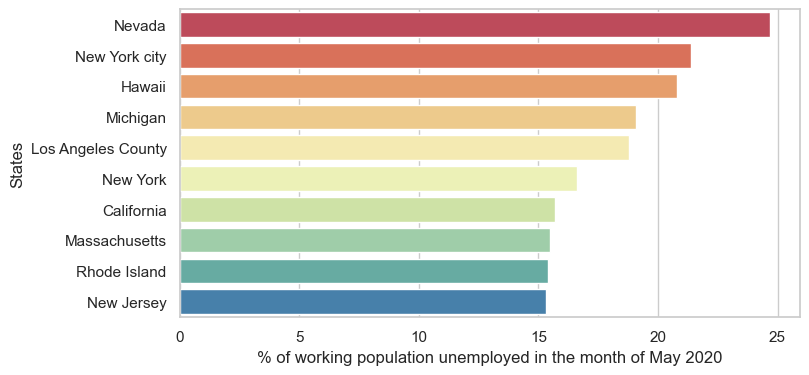

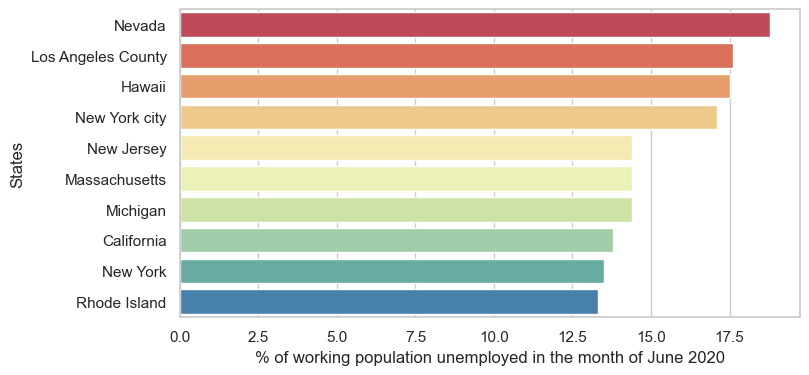

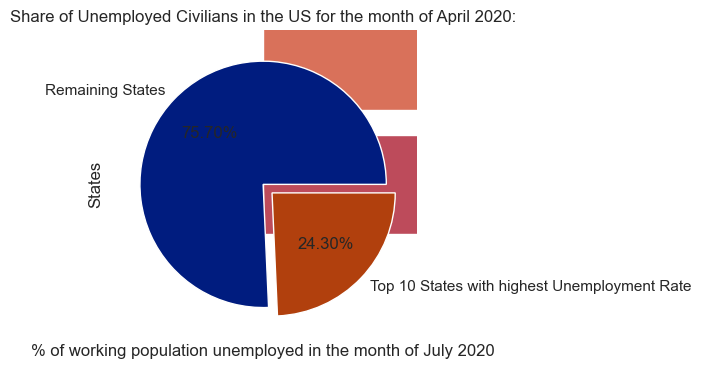

The top 10 states make up 24.30 percent of all unemployed civilians in the US Labor Force in the month of April 2020






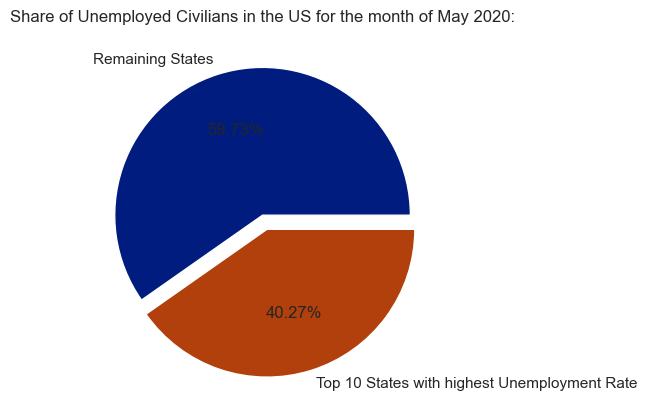

The top 10 states make up 40.27 percent of all unemployed civilians in the US Labor Force in the month of May 2020






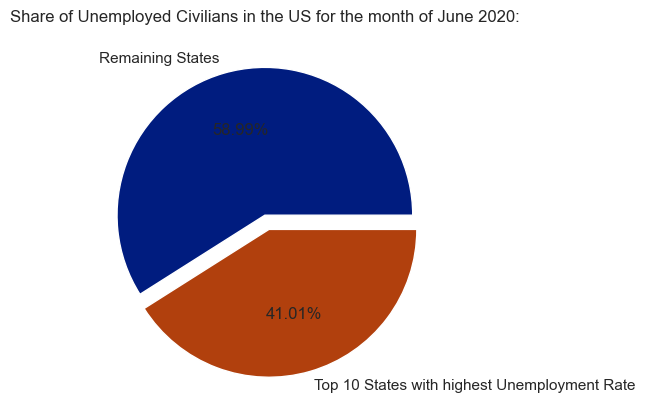

The top 10 states make up 41.01 percent of all unemployed civilians in the US Labor Force in the month of June 2020






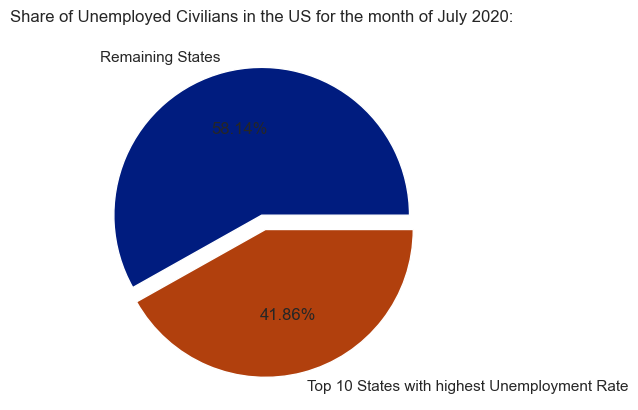

The top 10 states make up 41.86 percent of all unemployed civilians in the US Labor Force in the month of July 2020






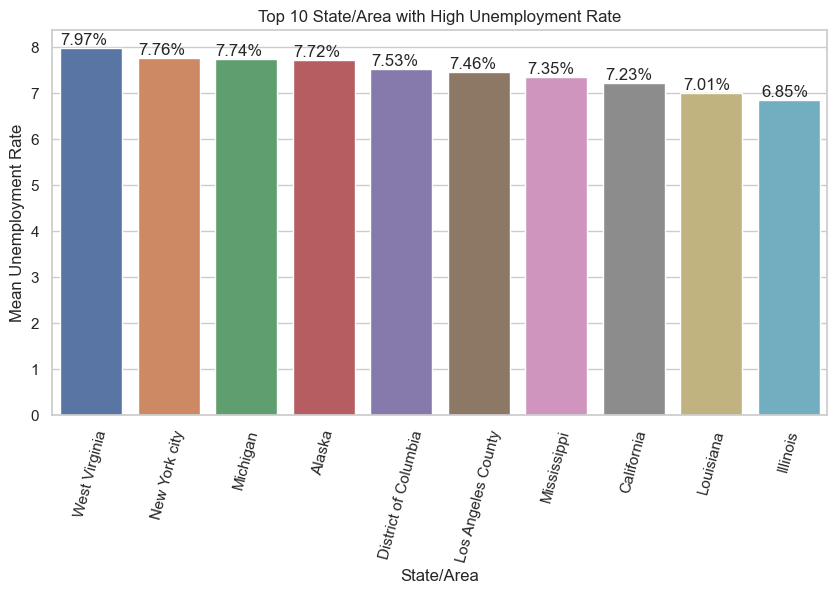

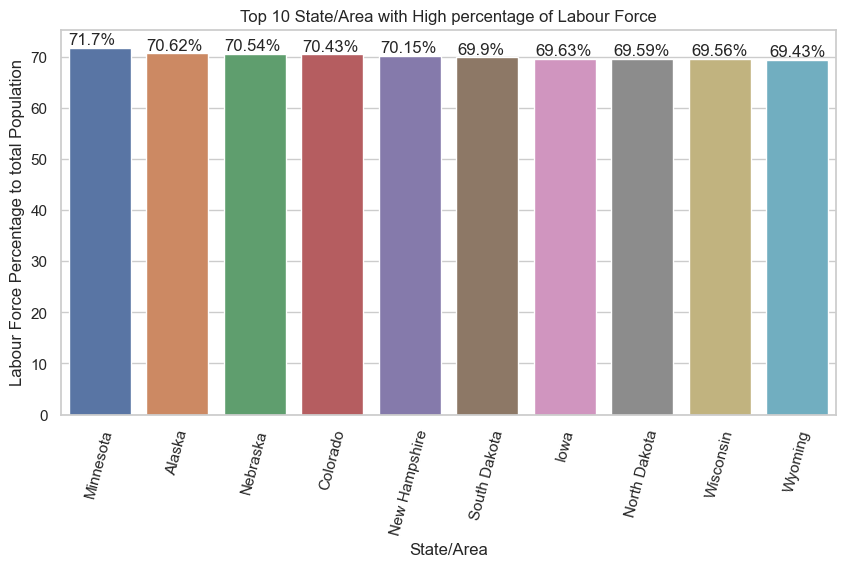

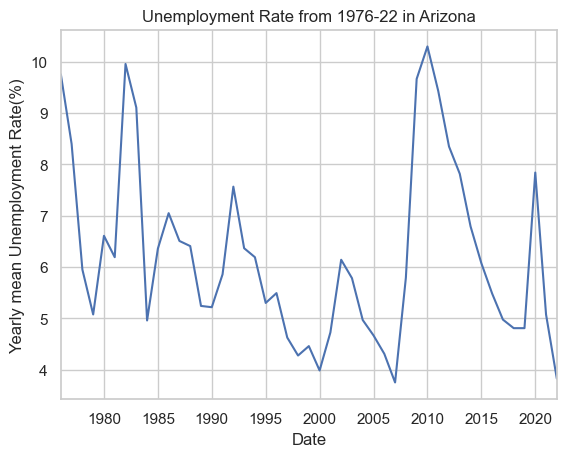

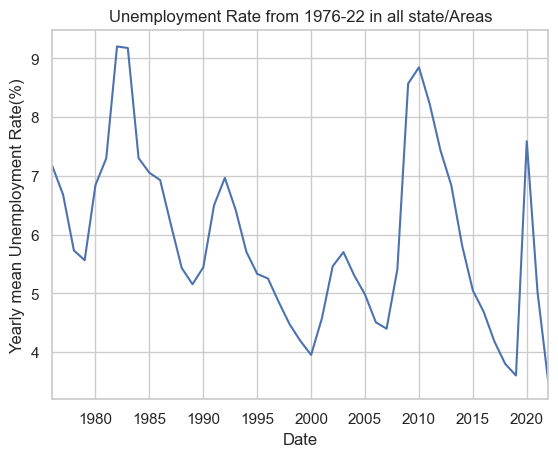

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns





# In[2]:


df=pd.read_csv('Unemployment in America Per US State.csv')
df


# In[3]:


df.info()


# In[4]:


def objToInt(col):
    if df.dtypes[i]!='int64' and df.dtypes[i]!='float64':
        df[col]=df[col].str.replace(',','').astype(int)


# In[5]:


columns = df.columns
for i in range(2,len(columns)):
    objToInt(columns[i])
df.head()


# In[6]:


df['Date']=pd.to_datetime(df['Year']*100 + df['Month'] ,format='%Y%m')
df.drop(columns=['Year','Month'],inplace=True)
df.head()


# In[7]:


k=pd.DataFrame(df.groupby('Date')[["Total Unemployment in State/Area"]].sum())
m=pd.DataFrame(df.groupby('Date')[["Total Civilian Labor Force in State/Area"]].sum())

k.reset_index(inplace=True)
m.reset_index(inplace=True)

k['Total Unemployment in State/Area']*=100

monthly_stats=pd.DataFrame()
monthly_stats['Date'] = df['Date'].unique()
monthly_stats['% Unemployment in US'] = k['Total Unemployment in State/Area']/m["Total Civilian Labor Force in State/Area"]
monthly_stats


# In[8]:


sns.set(style='whitegrid')

sns.lineplot(x = "Date",
             y = "% Unemployment in US",
             data = monthly_stats)


# In[9]:


top = monthly_stats.sort_values(by = '% Unemployment in US', ascending = False)[:10]
bottom = monthly_stats.sort_values(by = '% Unemployment in US', ascending = False)[-9:]
top


# In[10]:


fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = "Date", y = "% Unemployment in US", data = top, 
                  ax=ax)

x_dates = top['Date'].dt.strftime('%Y-%m')
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')


# In[11]:


covid_data = pd.DataFrame()
covid_data['States']=df['State/Area'].unique()

def addMonth(date, colname):
    newMonth = pd.DataFrame(df.loc[df['Date']==date,'Percent (%) of Labor Force Unemployed in State/Area'])
    newMonth.reset_index(inplace = True, drop = True)
    covid_data[colname] = newMonth


# In[12]:


date = ['2020-04-01','2020-05-01','2020-06-01','2020-07-01']
months = ['April','May','June','July']
for i in range(4):
    addMonth(date[i],months[i])
covid_data.head()


# In[13]:


def monthPlot(month):
    plt.figure(figsize = (8,4))    
    fig = sns.barplot(y = "States", 
                      x = month, 
                      data = covid_data, 
                      order = covid_data.sort_values(by = month, ascending = False).States.head(10),
                      orient = 'h',
                      palette = ('Spectral'))
    fig.set(xlabel = str('% of working population unemployed in the month of ' + month + ' 2020'))
for i in range(4):
    monthPlot(months[i])


# In[14]:


def fracTop(date,month):
    temp = int(df.loc[df['Date']== date][['Total Unemployment in State/Area']].sum())
    sort = list(covid_data.sort_values(by = month, ascending = False).States.head(10))
    unemp_top=int(df.loc[(df['Date']==date) & (df['State/Area'].isin(sort))][['Total Unemployment in State/Area']].sum())
    var = unemp_top*100/temp
    
    #Plotting a pie chart
    
    explode = [0,0.1]
    keys = ['Remaining States','Top 10 States with highest Unemployment Rate']
    data = [100-var,var]
    color = sns.color_palette('dark')
    
    plt.pie(data, 
            labels = keys, 
            colors = color, 
            explode = explode, 
            autopct='%.02f%%')
    
    plt.title(str('Share of Unemployed Civilians in the US for the month of '+ month +' 2020:'))
    plt.show()
      
    
    print("The top 10 states make up " + "{:.2f}".format(var) + " percent of all unemployed civilians in the US Labor Force in the month of "+ month +" 2020\n\n\n\n")


# In[15]:


for i in range(len(date)):
    fracTop(date[i],months[i])


# In[16]:


# Top 10 State with High mean Unemployment Rate
Uneployment_by_state = df.groupby('State/Area')['Percent (%) of Labor Force Unemployed in State/Area'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
ax = sns.barplot(x = Uneployment_by_state.index, y = Uneployment_by_state.values)
plt.xticks(rotation=75)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+'%', (p.get_x() * 1.005, p.get_height() * 1.009))
ax.set_title('Top 10 State/Area with High Unemployment Rate')
ax.set_ylabel('Mean Unemployment Rate')
plt.show()


# In[17]:


# Top 10 State with High percentage of Labour Force
Uneployment_by_state = df.groupby('State/Area')["Percent (%) of State/Area's Population"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
ax = sns.barplot(x = Uneployment_by_state.index, y = Uneployment_by_state.values)
plt.xticks(rotation=75)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.009))
ax.set_title('Top 10 State/Area with High percentage of Labour Force')
ax.set_ylabel('Labour Force Percentage to total Population')
plt.show()


# In[18]:


df.set_index('Date',inplace=True)
df.head()


# In[19]:


state_name = 'Arizona'
ax = df.loc[df['State/Area'] == state_name].resample('Y')['Percent (%) of Labor Force Unemployed in State/Area'].mean().plot()
ax.set_title('Unemployment Rate from 1976-22 in '+state_name)
ax.set_ylabel('Yearly mean Unemployment Rate(%)')
ax.grid('on')
plt.show()


# In[20]:


# overall employment Rate of all state's area
ax = df.resample('Y')['Percent (%) of Labor Force Unemployed in State/Area'].mean().plot()
ax.set_title('Unemployment Rate from 1976-22 in all state/Areas')
ax.set_ylabel('Yearly mean Unemployment Rate(%)')
ax.grid('on')
plt.show()


# In[ ]:



   


# In[ ]:





# In[ ]:




